## Baixando os dados

In [2]:
# importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# carregando os dados
df = pd.read_csv('gym_churn_us.csv')

## AED

In [4]:
# visualizando as informações do DF
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# visualizando as primeiras linhas do DF
print(df.head())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

Observando as informações do DF é possível afirmar que não há valores ausentes nos dados.

In [6]:
# descrição dos dados
print(df.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

Observando os valores da média e do desvio padrão do DataFrame, podemos concluir que:
- Há uma proporção equilibrada de clientes homens e mulheres, uma vez que a média e o desvio padrão ficam próximos de 0.5
- Cerca de 84% dos clientes moram ou trabalham perto da localização da academia (mean: 0.84)
- Quase metade dos clientes são funcionários de companhias parceiras (mean: 0.48; std: 0.49)
- Cerca de 30% dos clientes são provenientes de uma oferta "traga um amigo" (mean: 0.30)
- Cerca de 90% dos clientes fornecem seu número de telefone (mean: 0.90)
- Observando o terceiro quartil dos períodos de contrato, é possível afirmar que a maior parte dos contratos não passa de 6 meses
- Cerca de 41% dos clientes participam de sessões em grupo (mean: 0.41)
- Os clientes têm entre 18 e 41 anos, sendo que a maior parte deles tem até 31 anos
- Os clientes gastam em média 146.94 com outros serviços da academia
- Os clientes ficam em média 3 meses, com a grande maioria durando até 5 meses
- A maioria dos clientes frequenta a academia 1 vez por semana
- A taxa de desistência ficou em 26% (mean: 0.26)

In [7]:
# agrupando o DF por 'Churn' e calculando a média
churn_stats = df.groupby('Churn').mean()
print(churn_stats)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Observando os valores das médias das características dos clientes ativos e não ativos, podemos concluir que:
- Há uma proporção equilibrada de clientes homens e mulheres nos dois grupos
- A maioria das pessoas em ambos os grupos mora ou trabalha na vizinhança onde a academia está localizada
- Cerca de 35% (mean: 0.35) dos clientes inativos são funcionários de companhias parceiras, já no grupo de clientes ativos esse número sobe para 53% (mean: 0.53)
- Apenas 18% (mean: 0.18) dos clientes inativos foram oriundos de uma oferta "traga um amigo". Para os clientes ativos, esse número sobe para 35% (mean: 0.35)
- Em ambos os grupos, a maioria dos clientes fornece seus números de telefone. Média próxima de 90% em ambos
- O tempo de contrato dos clientes ativos é em média maior que o dos clientes inativos (5.74 contra 1.72)
- Cerca de 46% (mean: 0.46) dos clientes ativos participam de sessões em grupo. Esse número cai para 26% (mean: 0.26) para o grupo de clientes inativos
- A média de idade é um pouco diferente para os dois grupos. Clientes ativos possuem em média 29 anos, já os inativos 26 anos
- Clientes ativos costumam gastar mais com outros serviços da academia (158.44 contra 115.08)
- Em relação aos meses remanescentes até que o contrato expira, os clientes inativos possuem em média menos meses para o vencimento do contrato (1.66 contra 5.28)
- Clientes ativos têm um 'Lifetime' maior que os clientes inativos (4.71 contra 0.99)
- Clientes ativos costumam ir mais vezes à academia (2 dias contra 1 dia dos inativos)

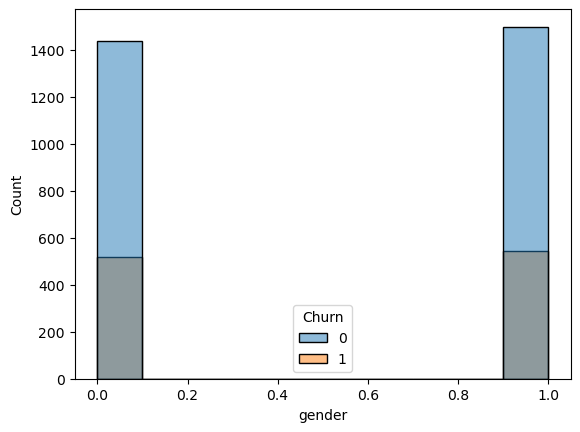

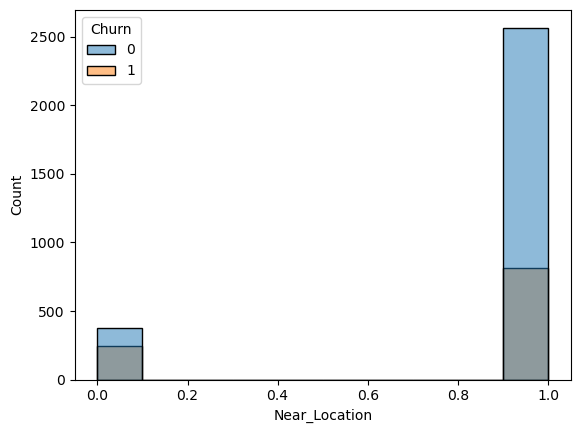

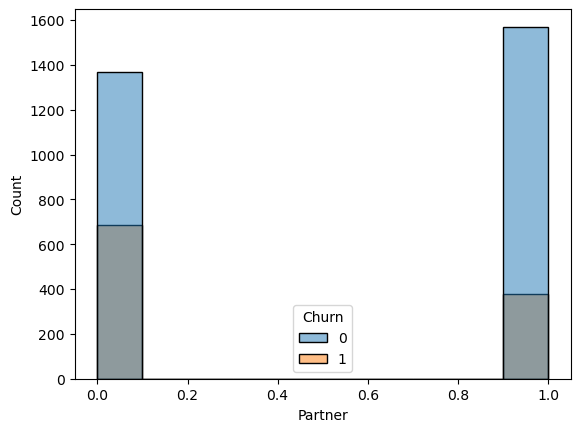

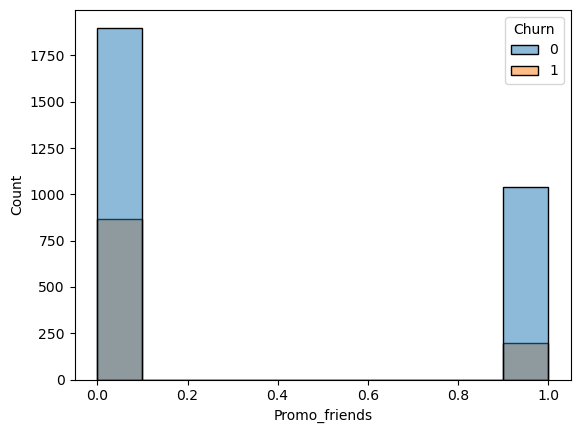

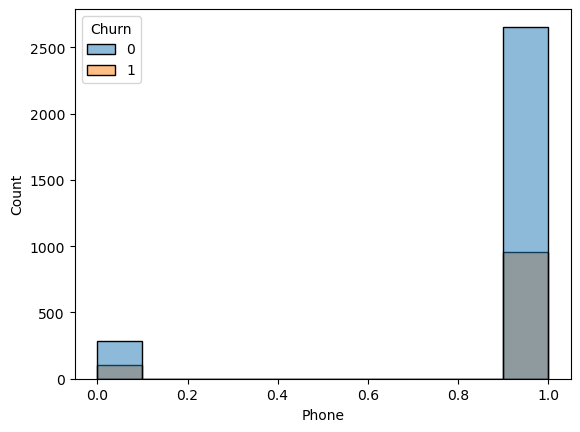

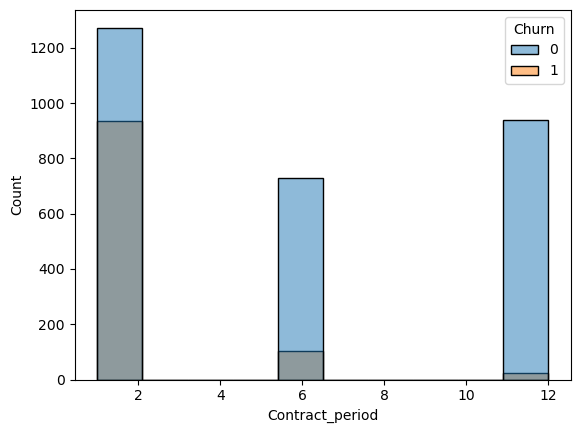

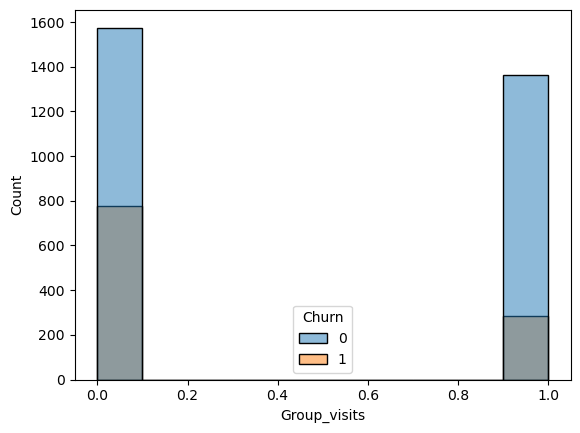

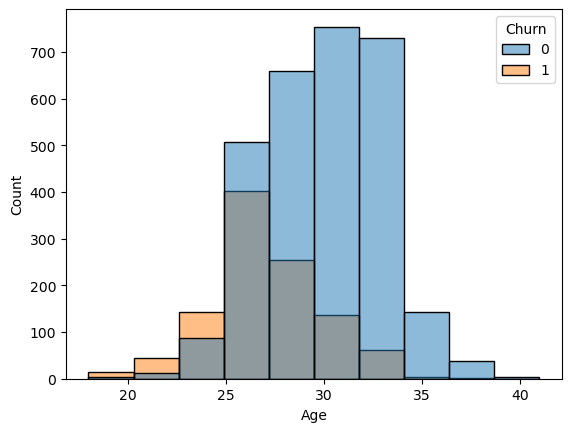

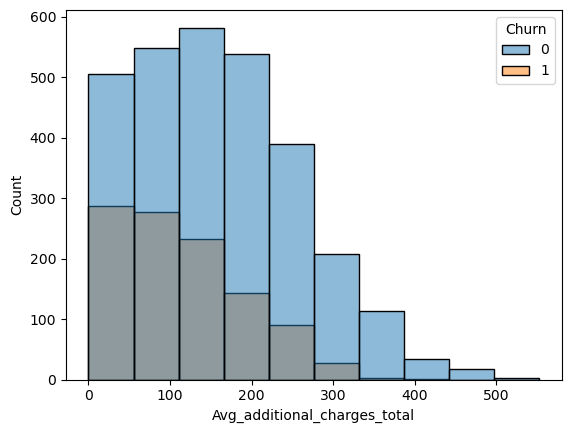

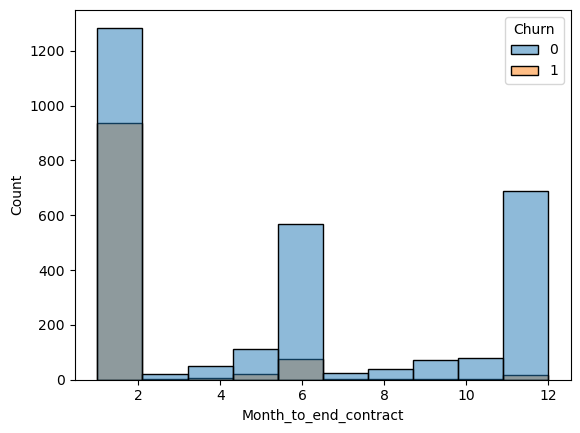

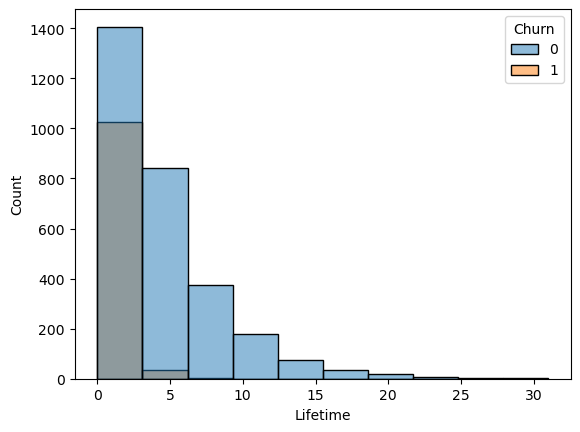

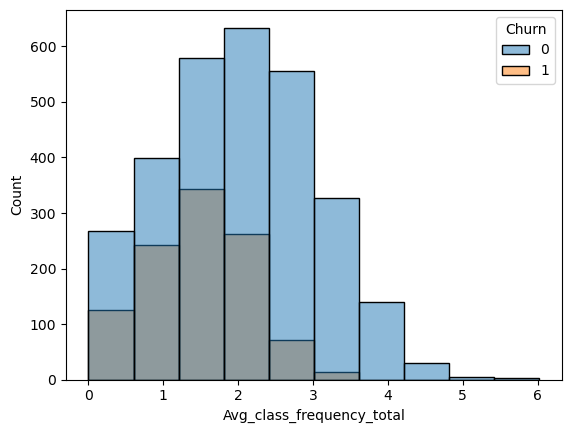

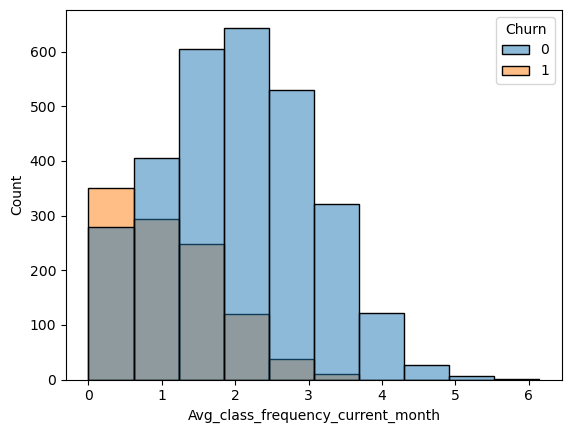

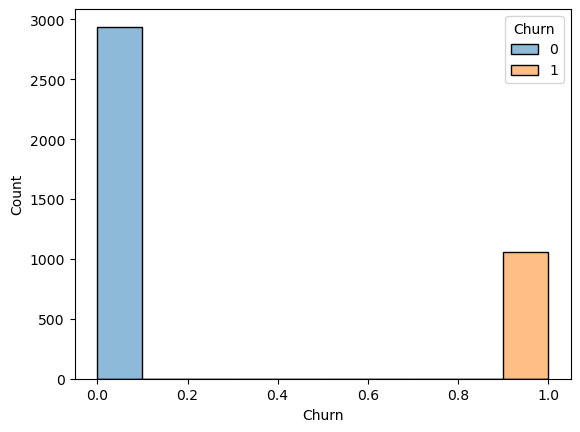

In [8]:
# ciclo for para criação de histogramas de características
for feature in df.columns:
  sns.histplot(data=df, x=feature, bins = 10, hue='Churn', alpha=0.5)
  plt.show()

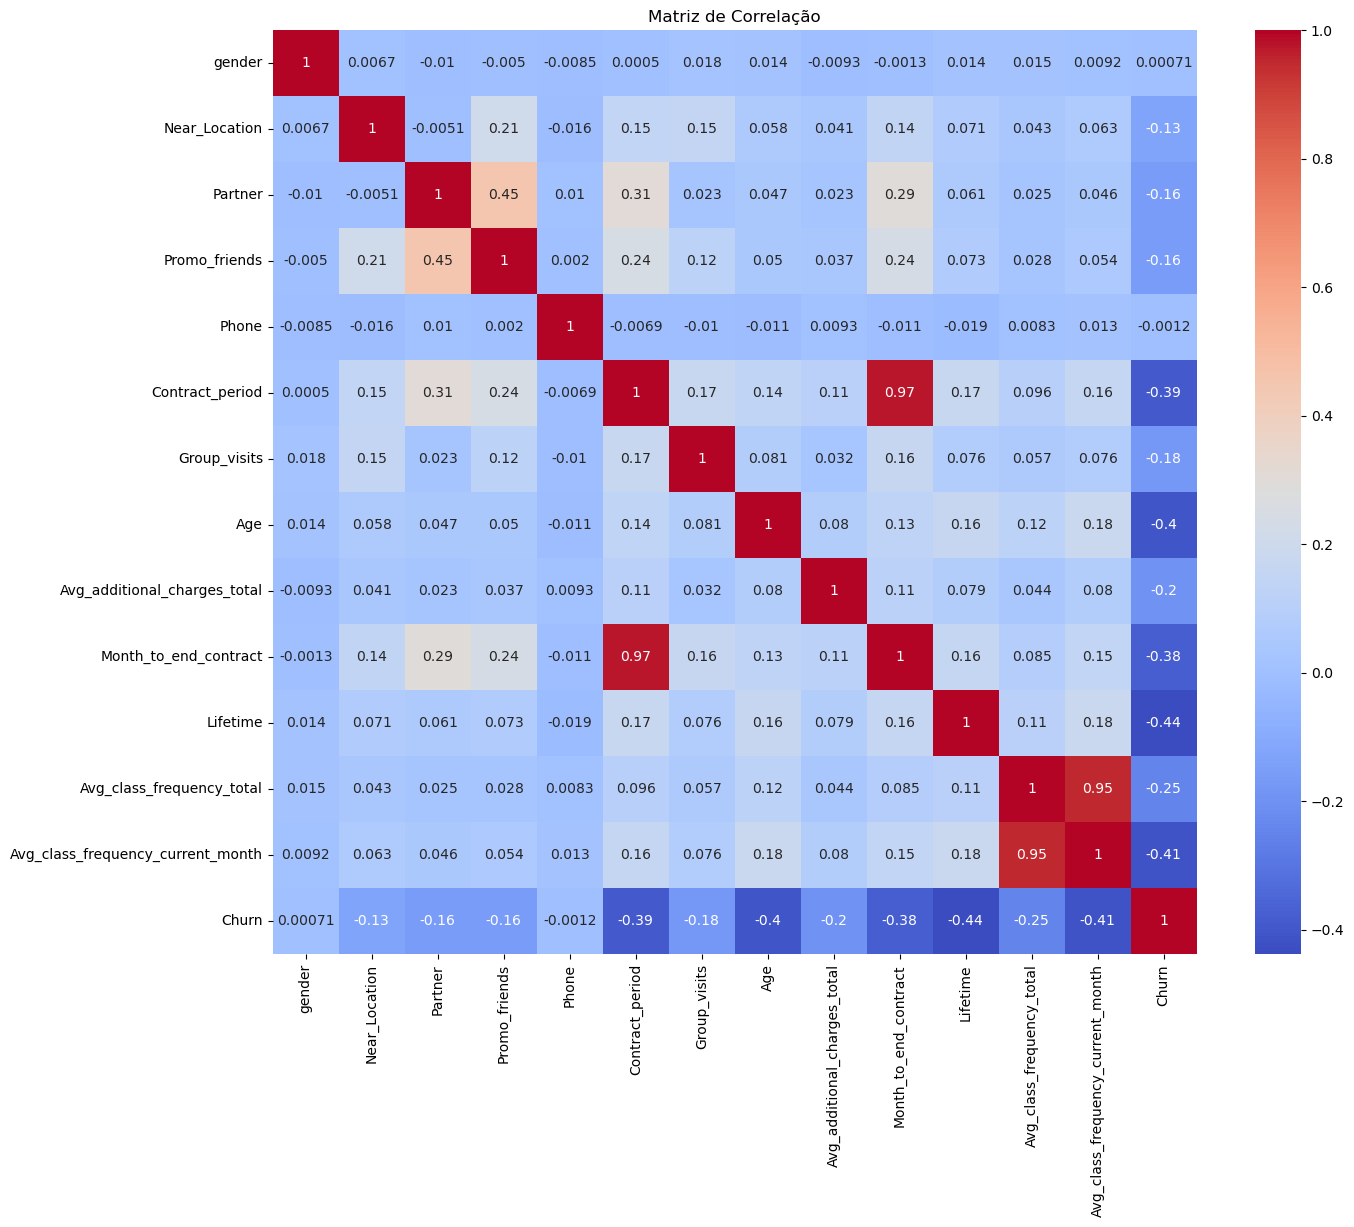

In [9]:
# Matriz de correlação
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Observando a matriz de correlação, notamos que o churn não tem uma correlação muito forte com nenhuma das características.

# Modelo de predição de churn

In [10]:
# preparando os dados
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# modelos
models = {
    'Regressão Logística': LogisticRegression(random_state=0, max_iter=1000),
    'Floresta Aleatória': RandomForestClassifier(random_state=0)
}

results = {}

for name, model in models.items():
    # treinamento
    model.fit(X_train, y_train)
    
    # predição
    y_pred = model.predict(X_test)
    
    # métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }
    
    print(f"\n{name}:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Sensibilidade (Recall): {recall:.4f}")


Regressão Logística:
Acurácia: 0.9237
Precisão: 0.8586
Sensibilidade (Recall): 0.8283

Floresta Aleatória:
Acurácia: 0.9163
Precisão: 0.8394
Sensibilidade (Recall): 0.8182


Apesar dos resultados de ambos os modelos serem bem parecidos, a Regressão Loística apresentou números ligeiramente melhores.

## Passo 4 - Agrupamentos de clientes

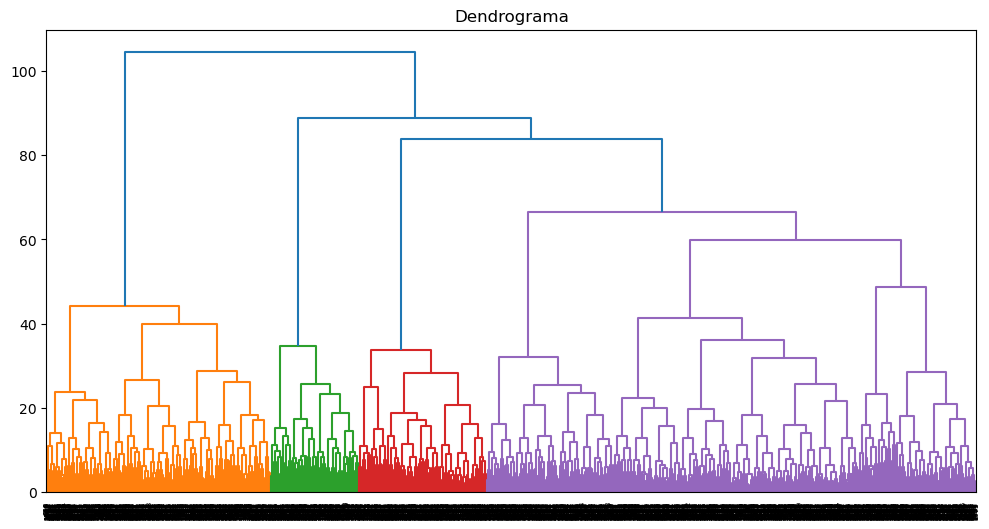

In [11]:
# preparando os dados para clustering
X_cluster = df.drop('Churn', axis=1)

# padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# dendrograma
plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top')
plt.title('Dendrograma')
plt.show()

In [12]:
# definindo o número de agrupamentos como 5
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_scaled)

# criando uma nova coluna no DF
df['Cluster'] = labels

# agrupando o DF por cluster e tirando a média
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.486819       1.000000  0.243409       0.007030  0.899824   
1        0.592493       0.970509  0.288204       0.123324  0.898123   
2        0.499469       0.943677  0.740701       0.489904  0.900106   
3        0.483360       1.000000  0.798732       1.000000  0.911252   
4        0.496324       0.000000  0.466912       0.077206  0.915441   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               1.978910      0.326889  28.239016   
1               2.898123      0.482574  30.339142   
2              11.866100      0.551541  29.905420   
3               3.079239      0.445325  29.052298   
4               2.209559      0.215074  28.483456   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                 

Observando os valores médios das características, as seguintes características parecem ter relação com as taxas de desistência:
- Tempo de contrato
- Lifetime
- Frequência média de visitas por semana
- Quantidade total de dinheiro gasto em outros serviços da academia

__Caracaterísticas de cada grupo__

Todos os agrupamentos são formados majoritariamente por clientes que moram ou trabalham perto da localização da academia, exceto o agrupamento 2 que possui apenas pessoas que moram longe.

Cluster 0:
- Predominantemente formado por funcionários de companhias parceiras
- Mais da metade é proveniente de programas de indicação
- Períodos contratuais mais longos
- Cerca de metade gosta de participar de sesões em grupo
- Idade média de 30 anos
- Gastam uma boa quantia com outros serviços da academia
- Lifetime médio de cerca de 5 meses
- Costumam ir à academia 2 vezes por semana
- Taxa de desistência baixíssima

Cluster 1:
- Pouco menos da metade é funcionário de companhias parceiras
- Não fornecem seus números de telefone
- Período de contrato médio de cerca de 5 meses
- Cerca de 40% gosta de participar de sessões em grupo
- Idade média de 29 anos
- Gastam uma quantia razoável com outros serviços da academia
- Lifetime médio de cerca de 4 meses
- Costumam ir à academia 2 vezes por semana
- Baixa taxa de desistência

Cluster 2:
- Não moram nem trabalham perto da localçização da academia
- Pouco menos da metade veio de programas de indicação
- Período contratual baixo, a maioria tem contratos de 1 mês
- A maioria não participa de sessões em grupo
- Idade média de 28 anos
- Um dos grupos que menos gastam com outros serviços da academia
- Clientes com o contrato a 2 meses do vencimento
- Lifetime médio de cerca de 3 meses
- Costumam frequentar à academia 1 vez por semana
- Taxa de desistência alta (44%)

Cluster 3:
- A maioria não é funcionário de companhias parceiras
- A grande maioria não veio de programas de indicação
- Apenas 24% é proveniente de progrmas de indicação
- Menor média de período contratual de todos os grupos
- A maioria não participa de sessões em grupo
- Idade média de 28 anos
- É o grupo que menos gasta com outros serviços da academia
- Clientes com o contrato perto do vencimento
- Menor lifetime entre os grupos, cerca de 2 meses
- Costumam ir à academia 1 vez por semana
- Maior taxa de desistência, cerca de metade do grupo é de clientes inativos

Cluster 4:
- A maioria não é funcionário de companhias parceiras
- A grande maioria não veio de programas de indicação
- Período contratual baixo, a maioria tem contratos de 1 mês
- Pouco menos da metade gosta de participar de sessões em grupo
- Idade média de 30 anos
- Gastam uma boa quantia com outros serviços da academia
- Clientes com o contrato a 2 meses do vencimento
- Lifetime médio de cerca de 5 meses
- Costumam ir à academia mais de 2 vezes por semana
- Taxa de desistência baixíssima

Observando os perfis de cada grupo, cheguei a seguinte conclusão:
- Cluster 0 são os clientes que gostaram da academia, fecharam periodos contratuais mais longos, vão duas vezes por semana à academia e gostam de gastar com outros serviços da academia
- Cluster 1 tem o perfil semelhante ao do cluster 0, porém tem contratos um pouco mais curtos
- Cluster 2 é o mais estranho, com usuários que moram longe e que não foram provenientes de indicação de amigos. Eles vão pouco à academia e tem contratos de período curto
- Cluster 3 são os usuários médios, pessoas que moram no bairro e que vão a academia 2 vezes por semana. Fecham contratos mais curtos e não costumam gastar muito com outros serviços da academia
- Cluster 4 são os chamados "heavy users", clientes que costumam treinar muitas vezes por semana, tem o maior lifetime entre os grupos, gostam de gastar com outros serviços da academia

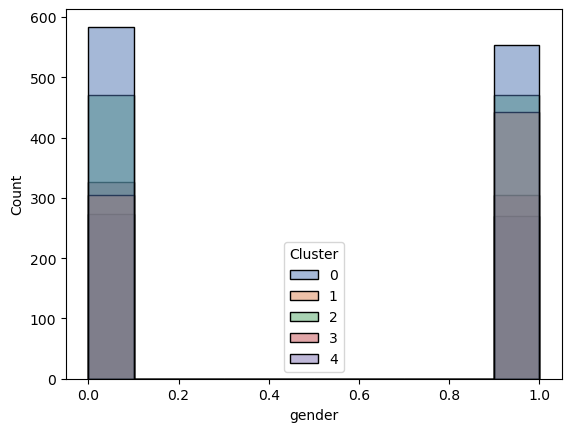

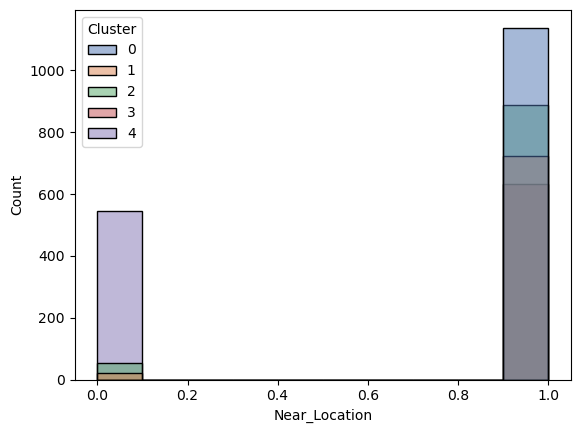

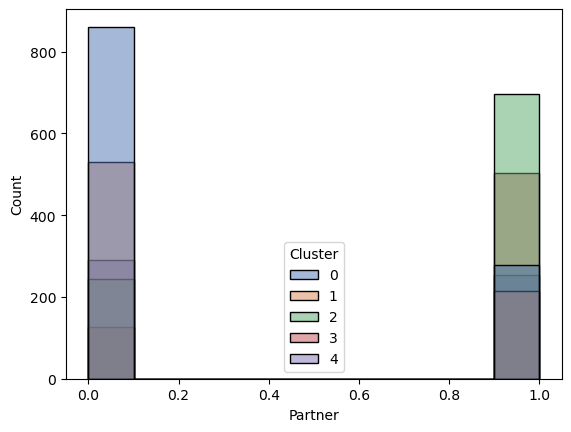

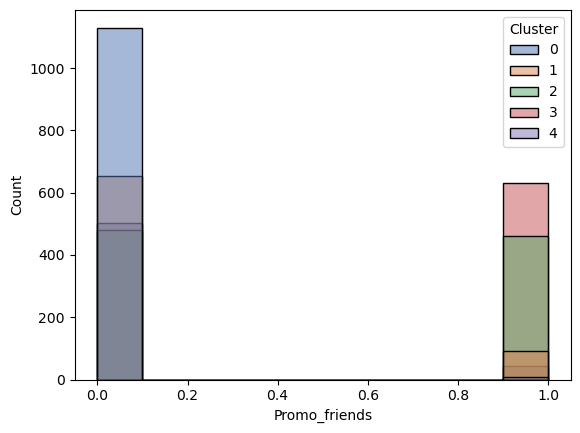

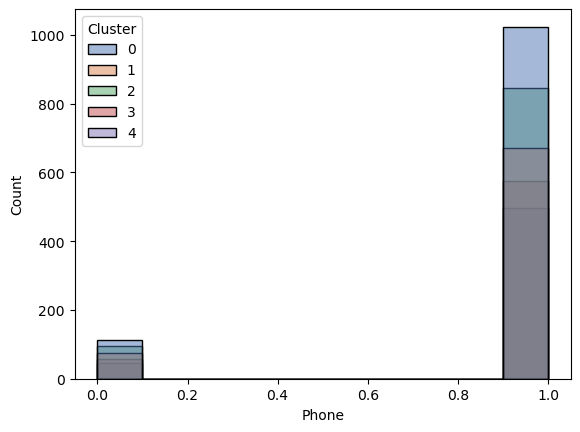

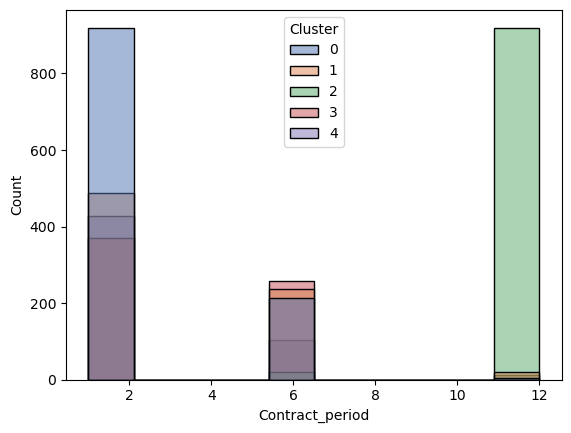

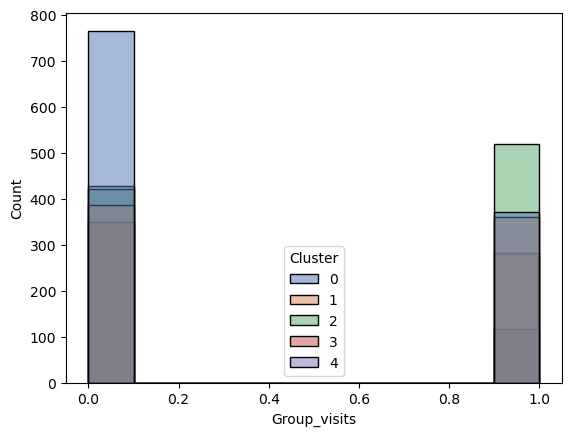

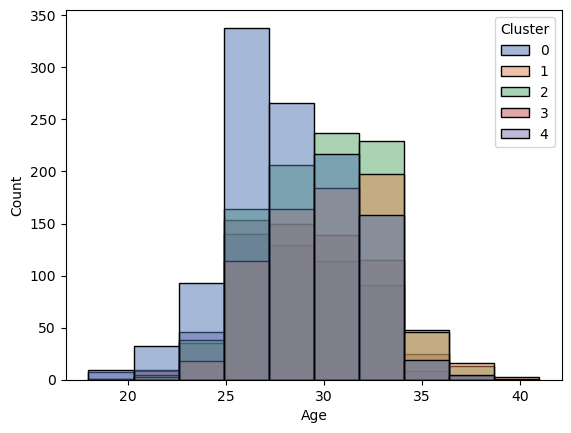

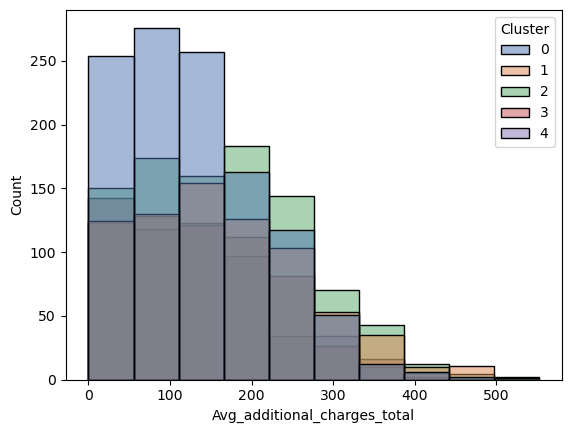

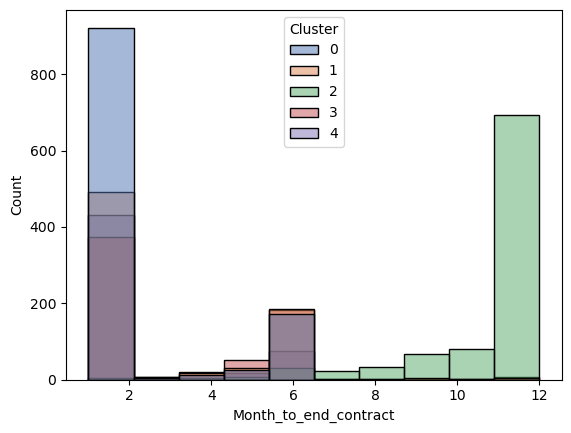

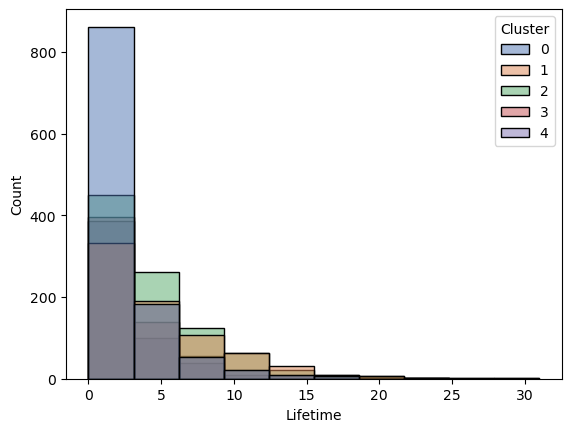

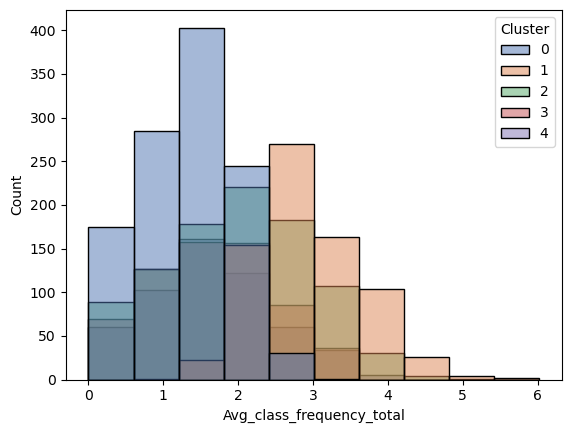

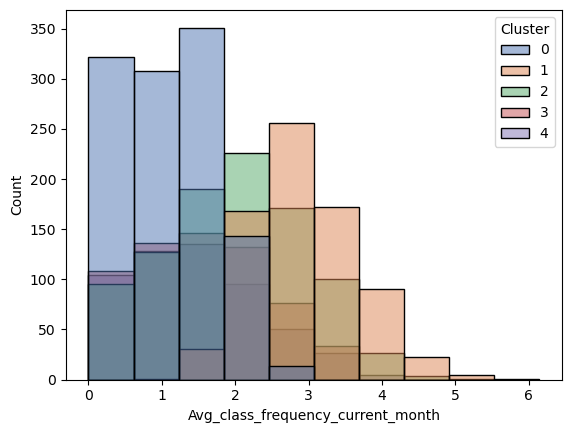

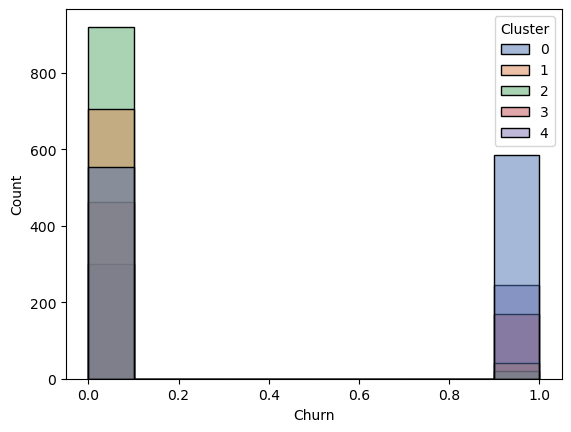

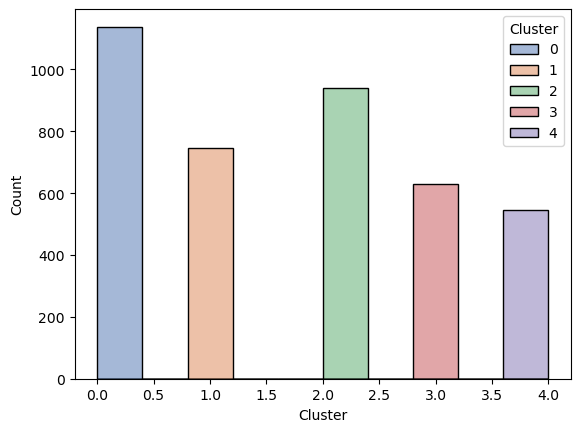

In [13]:
# ciclo for para criação de histogramas de características
for feature in df.columns:
  sns.histplot(data=df, x=feature, bins = 10, hue='Cluster', alpha=0.5, palette='deep')
  plt.show()

Observando os histogramas, podemos concluir que o cluster 3 é o que possui mais clientes. Portanto, é o mais representativo. Os clientes desse agrupamento têm as seguintes características:
- Período de contrato baixo. A grande maioria dos clientes desse agrupamento tem contratos de 1 mês
- Lifetime baixo. O menor entre os clusters
- Vão a academia 1 vez por semana em média
- Menor média de dinheiro gasto em outros serviços da academia
- Alta taxa de desistência. Cerca de 50% dos clientes desse cluster abandonaram a academia


Taxa de Churn por Cluster:
Cluster
0    0.513181
1    0.054960
2    0.022317
3    0.269414
4    0.450368
Name: Churn, dtype: float64


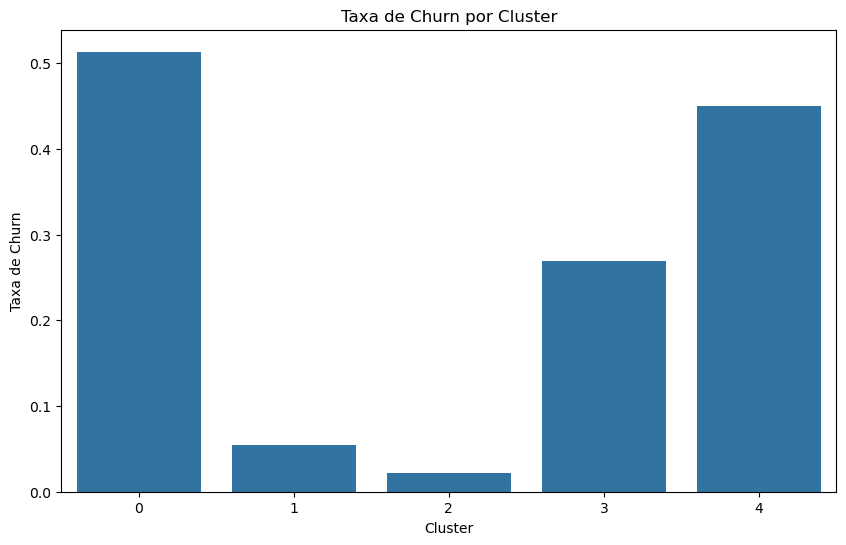

In [14]:
# taxa de desistência por cluster
churn_by_cluster = df.groupby('Cluster')['Churn'].mean()
print(f"\nTaxa de Churn por Cluster:")
print(churn_by_cluster)

# Visualização dos clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values)
plt.title('Taxa de Churn por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Taxa de Churn')
plt.show()

Como é possível observar, os clusters 0 e 4 são os agrupamentos com a menor taxa de desistência. Eles possuem carcaterísticas contrárias ao cluster 3, que é o mais representativo. Suas características são:
- Perídos de contrato mais longos. No caso do cluster 0, a média do período de contrato ficou ligeiramente acima de 10
- Lifetime acima de 4 meses
- Vão a academia 2 vezes por semana em média
- Maiores médias de quantia gasta em outros serviços da academia
- Baixa taxa de desistência

## Conclusões e recomendações

#### Conclusões
No geral os clientes apresentam as seguintes características:
- Há uma proporção equilibrada de clientes homens e mulheres, uma vez que a média e o desvio padrão ficam próximos de 0.5
- Cerca de 84% dos clientes moram ou trabalham perto onde a academia está localizada (mean: 0.84)
- Quase metade dos clientes são funcionários de companhias parceiras (mean: 0.48; std: 0.49)
- Cerca de 30% dos clientes são provenientes de uma oferta "traga um amigo" (mean: 0.30)
- Cerca de 90% dos clientes fornecem seu número de telefone (mean: 0.90)
- Observando o terceiro quartil dos períodos de contrato, é possível afirmar que a maior parte dos contratos não passa de 6 meses
- Cerca de 41% dos clientes participam de sessões em grupo (mean: 0.41)
- Os clientes têm de 18-41 anos, sendo que a maior parte deles têm até 31 anos
- Os clientes gastam em média 146.94 com outros serviços da academia
- Os clientes ficam em média 3 meses, com a grande maioria durando até 5 meses
- A maioria dos clientes frequenta a academia 1 vez por semana

Observando os valores das médias das características dos clientes ativos e não ativos, podemos concluir que:
- Cerca de 35% (mean: 0.35) dos clientes inativos são funcionários de companhias parceiras, já no grupo de clientes ativos esse número sobe para 53% (mean: 0.53)
- Apenas 18% (mean: 0.18) dos clientes inativos foram oriundos de uma oferta "traga um amigo". Para os clientes ativos, esse número sobe para 35% (mean: 0.35)
- O tempo de contrato dos clientes ativos é em média maior que a dos clientes inativos (5.74 contra 1.72)
- Cerca de 46% (mean: 0.46) dos clientes ativos participa de sessões em grupo. Esse número cai para 26% (mean: 0.26) para o grupo de clientes inativos
- A média de idade é um pouco diferente para os dois grupos. Clientes ativos possuem em média 29 anos, já os inativos 26 anos
- Clientes ativos costumam gastar mais com outros serviços da academia (158.44 contra 115.08)
- Em relação aos meses remanescentes até que o contrato expira, os clientes inativos possuem em média menos meses para o vencimento do contrato (1.66 contra 5.28)
- Clientes ativos tem um 'Lifetime' maior que os clientes inativos (4.71 contra 0.99)
- Clientes ativos costumam ir mais vezes a academia (2 dias contra 1 dia dos inativos)

Após a construção de um modelo para predizer a rotatividade dos clientes, o modelo Floresta Aleatória apresentou resultados ligeiramentes melhores, ele superou a Regressão Logística em todos os quesitos testados.

Foi feito uma padronização dos dados com o intuito de criar agrupamentos de clientes. Depois de criado os agrupamentos (clusters), as seguintes características pareceram ter relação com as taxas de desistência:
- Tempo de contrato
- Lifetime
- Frequência média de visitas por semana
- Quantidade total de dinheiro gasto em outros serviços da academia

Observando os agrupamentos criados, os clusters que mais se destacaram foram o 0 e o 3. O cluster 0 apresentou a menor taxa de desistência e o cluster 3 apresentou a maior taxa de desistência e também é o que apresentou o maior número de clientes. Esses dois agrupamentos mostraram ser antagônicos em relação ao tempo de contrato, lifetime, frequência média de visitas por semana e quantidade total de dinheiro gasto em outros serviços da academia.

#### Recomendações

__Grupos-alvo prioritários:__
- Clientes com frequência decrescente
- Clientes com contratos perto do vencimento

__Estratégias de retenção recomendadas:__
- Programa de reengajamento para clientes com frequência reduzida
- Renovação antecipada com descontos
- Descontos para clientes que fecharem um contrato mais longo
- Programas de fidelização através de gastos com outros serviços da academia